# Exploring the NL Central with pybaseball

A brief analysis and visualization of the NL Central division in 2018. Teams: Brewers, Cardinals, Cubs, Pirates, and Reds.

In [2]:
import pybaseball as pyball
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

ModuleNotFoundError: No module named 'pybaseball'

In [6]:
# Get all NL Central Team Records for 2018
year = 2018
brewers = pyball.schedule_and_record(year, 'MIL')
cardinals = pyball.schedule_and_record(year, 'STL')
cubs = pyball.schedule_and_record(year, 'CHC')
pirates = pyball.schedule_and_record(year, 'PIT')
reds = pyball.schedule_and_record(year, 'CIN')

NameError: name 'pyball' is not defined

## Summary Statistics
A quick glance at the summary statistics for each team in order of their ending division rank.

Looking at these statistics, you can see the similarity in overall performance. Mean Runs are very similar for the top three teams with the #3 Cardinals slightly edging out the Brewers and Cubs. However, in Runs Allowed, the #2 Cubs come out in front, with the Brewers second, and the Cardinals third.

Interestingly, the hottest streak belongs to the Pirates, who ended the season ranked 4th in the division.

In [1]:
brewers.describe()

NameError: name 'brewers' is not defined

In [181]:
cubs.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,163.000000,163.000000,163.000000,163.000000,162.000000,163.000000
mean,4.668712,3.957055,9.257669,1.901840,35834.290123,0.552147
std,3.574697,3.004831,0.959610,1.055349,8207.139905,2.152097
min,0.000000,0.000000,9.000000,1.000000,10428.000000,-5.000000
25%,2.000000,2.000000,9.000000,1.000000,32941.750000,-1.000000
50%,4.000000,4.000000,9.000000,2.000000,38460.500000,1.000000
75%,7.000000,6.000000,9.000000,2.000000,40887.750000,2.000000
max,16.000000,18.000000,17.000000,4.000000,53904.000000,7.000000


In [182]:
cardinals.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,4.685185,4.265432,9.179012,2.820988,35646.950617,0.339506
std,3.111733,2.925139,0.677081,0.763323,10010.423048,2.195884
min,0.000000,0.000000,9.000000,1.000000,7230.000000,-4.000000
25%,3.000000,2.000000,9.000000,3.000000,27865.750000,-1.000000
50%,4.000000,4.000000,9.000000,3.000000,39358.500000,1.000000
75%,6.000000,6.000000,9.000000,3.000000,43495.750000,2.000000
max,18.000000,17.000000,14.000000,5.000000,48247.000000,8.000000


In [183]:
pirates.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,161.000000,161.000000,161.000000,161.000000,159.000000,161.000000
mean,4.298137,4.304348,9.161491,3.242236,25155.056604,0.254658
std,3.043117,3.480380,0.797658,1.122366,10387.115817,2.835665
min,0.000000,0.000000,6.000000,1.000000,6852.000000,-5.000000
25%,2.000000,2.000000,9.000000,3.000000,17820.500000,-2.000000
50%,4.000000,4.000000,9.000000,4.000000,23244.000000,1.000000
75%,6.000000,6.000000,9.000000,4.000000,33158.500000,2.000000
max,14.000000,17.000000,15.000000,4.000000,53139.000000,11.000000


In [184]:
reds.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,4.296296,5.055556,9.203704,4.987654,25017.240741,-0.549383
std,3.007008,3.272794,0.697279,0.110766,10435.382685,2.494846
min,0.000000,0.000000,7.000000,4.000000,8855.000000,-8.000000
25%,2.000000,3.000000,9.000000,5.000000,17615.750000,-2.000000
50%,4.000000,5.000000,9.000000,5.000000,22749.000000,-1.000000
75%,6.000000,7.000000,9.000000,5.000000,31618.750000,1.000000
max,15.000000,19.000000,13.000000,5.000000,49911.000000,7.000000


## A look at Wins, Win Percentages, and Games Back
Comparing the wins, win percentages, and games back for each team of the NL Central

First we gather each team's Wins, Losses, and Win Percentages at the time of each game

In [185]:
# Gets wins-to-date, losses-to-date, and win_percent-to-date for each team
brewers['Wins'] = np.where(brewers['W/L']=='W', 1, (np.where(brewers['W/L']=='W-wo', 1, 0))).cumsum()
brewers['Losses'] = np.where(brewers['W/L']=='L', 1, (np.where(brewers['W/L']=='L-wo', 1, 0))).cumsum()
brewers['Win_Percentage'] = brewers['Wins'] / (brewers['Wins'] + brewers['Losses'])

cubs['Wins'] = np.where(cubs['W/L']=='W', 1, (np.where(cubs['W/L']=='W-wo', 1, 0))).cumsum()
cubs['Losses'] = np.where(cubs['W/L']=='L', 1, (np.where(cubs['W/L']=='L-wo', 1, 0))).cumsum()
cubs['Win_Percentage'] = cubs['Wins'] / (cubs['Wins'] + cubs['Losses'])

cardinals['Wins'] = np.where(cardinals['W/L']=='W', 1, (np.where(cardinals['W/L']=='W-wo', 1, 0))).cumsum()
cardinals['Losses'] = np.where(cardinals['W/L']=='L', 1, (np.where(cardinals['W/L']=='L-wo', 1, 0))).cumsum()
cardinals['Win_Percentage'] = cardinals['Wins'] / (cardinals['Wins'] + cardinals['Losses'])

pirates['Wins'] = np.where(pirates['W/L']=='W', 1, (np.where(pirates['W/L']=='W-wo', 1, 0))).cumsum()
pirates['Losses'] = np.where(pirates['W/L']=='L', 1, (np.where(pirates['W/L']=='L-wo', 1, 0))).cumsum()
pirates['Win_Percentage'] = pirates['Wins'] / (pirates['Wins'] + pirates['Losses'])

reds['Wins'] = np.where(reds['W/L']=='W', 1, (np.where(reds['W/L']=='W-wo', 1, 0))).cumsum()
reds['Losses'] = np.where(reds['W/L']=='L', 1, (np.where(reds['W/L']=='L-wo', 1, 0))).cumsum()
reds['Win_Percentage'] = reds['Wins'] / (reds['Wins'] + reds['Losses'])

### Graphing Wins and Win Percentages
Here we can see that the Brewers and Cubs were in a tightly contested race all year long. At about game 120 the brewers went into a small slump while the Cardinals ascended, leading to a short period where the Brewers dropped to 3rd place. This didn't last long however, as the Brewers got back into a groove and found their way to 2nd and ultimately 1st place.

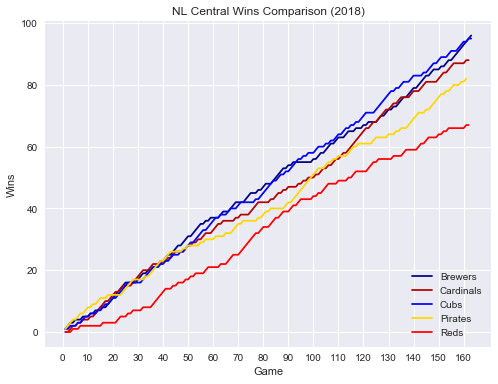

In [186]:
# Graph Wins Comparison #
plt.rcParams["figure.figsize"] = (8,6)

plt.plot(brewers['Wins'], label='Brewers', c='navy')
plt.plot(cardinals['Wins'], label='Cardinals', c='#b30000')
plt.plot(cubs['Wins'], label='Cubs', c='blue')
plt.plot(pirates['Wins'], label='Pirates', c='gold')
plt.plot(reds['Wins'], label='Reds', c='red')

plt.xticks(np.arange(0, len(brewers.index), step=10))
plt.xlabel('Game')
plt.ylabel('Wins')

plt.legend(loc='lower right')

plt.title("NL Central Wins Comparison ({})".format(year))

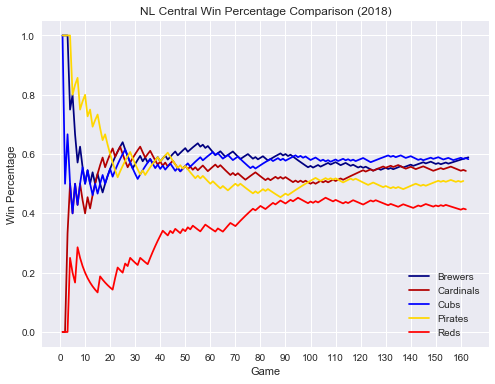

In [187]:
# Graph Win Percentage Comparison #
plt.rcParams["figure.figsize"] = (8,6)

plt.plot(brewers['Win_Percentage'], label='Brewers', c='navy')
plt.plot(cardinals['Win_Percentage'], label='Cardinals', c='#b30000')
plt.plot(cubs['Win_Percentage'], label='Cubs', c='blue')
plt.plot(pirates['Win_Percentage'], label='Pirates', c='gold')
plt.plot(reds['Win_Percentage'], label='Reds', c='red')

plt.xticks(np.arange(0, len(brewers.index), step=10))
plt.xlabel('Game')
plt.ylabel('Win Percentage')

plt.legend(loc='lower right')

plt.title("NL Central Win Percentage Comparison ({})".format(year))

### Graphing Games Back

First we create a modified column to numerically represent 'Games Back'

In [188]:
# Insert new column called 'int_GB' that represents GB as either negative (meaning behind) or 0.0 meaning in first or tied for first
def modify_gb(gb):
    if gb == 'Tied':
        gb = 0.0
    elif 'up' in gb:
        gb = 0.0 # float(gb.replace('up ', ''))
    else:
        gb = -float(gb)
    
    return gb
    
brewers['int_GB'] = brewers['GB'].dropna().apply(modify_gb)
cardinals['int_GB'] = cardinals['GB'].dropna().apply(modify_gb)
cubs['int_GB'] = cubs['GB'].dropna().apply(modify_gb)
pirates['int_GB'] = pirates['GB'].dropna().apply(modify_gb)
reds['int_GB'] = reds['GB'].dropna().apply(modify_gb)

#### What the Graph Shows
Graphing 'Games Back' gives an even clearer image of how the NL Central was contended throughout the year. 

The Reds fell to an early 10 Games Back, and never recovered. They ended the year at a season low of 28 Games Back.

The pirates, while contending early on, fell to ~13 Games Back mid-season. They showed signs of life in games 90-110, even surpassing the Cardinals for 3rd place. However, they would soon fall to a season low of ~15 Games Back.

The Brewers and Cubs were consistely within ~4 Games of each other for most of the season. While the Brewers had a rough patch in games 110-135 -- dropping to a season low of 6 Games Back, and falling behind the Cardinals for 2nd place -- they quickly recovered in the final games of the season. They would go on to defeat the Cubs in a Game 163 Divisional Tie-Breaker, becoming the NL Central Champions.

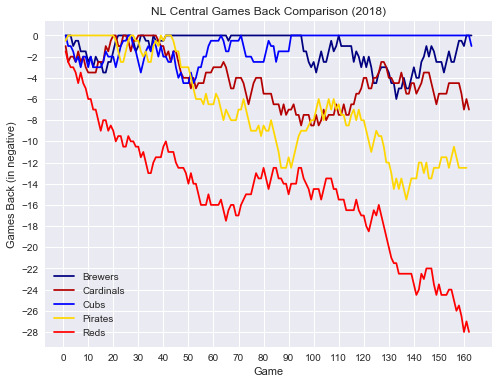

In [189]:
# Graph NL Central Games Back Comparison #
plt.rcParams["figure.figsize"] = (8,6)

plt.plot(brewers['int_GB'], label='Brewers', c='navy')
plt.plot(cardinals['int_GB'], label='Cardinals', c='#b30000')
plt.plot(cubs['int_GB'], label='Cubs', c='blue')
plt.plot(pirates['int_GB'], label='Pirates', c='gold')
plt.plot(reds['int_GB'], label='Reds', c='red')

plt.xticks(np.arange(0, len(brewers.index), step=10))
plt.yticks(np.arange(0, -30, step=-2))
plt.xlabel('Game')
plt.ylabel('Games Back (in negative)')

plt.title("NL Central Games Back Comparison ({})".format(year))
plt.legend(loc='lower left')

## Graphing Total Runs and Runs Allowed

First we create new columns for Total Runs, and Total Runs Allowed

In [190]:
# Get total runs-to-date and total runs_allowed-to-date for each team
brewers['Total_Runs'] = brewers['R'].cumsum()
brewers['Total_RA'] = brewers['RA'].cumsum()

cubs['Total_Runs'] = cubs['R'].cumsum()
cubs['Total_RA'] = cubs['RA'].cumsum()

cardinals['Total_Runs'] = cardinals['R'].cumsum()
cardinals['Total_RA'] = cardinals['RA'].cumsum()

pirates['Total_Runs'] = pirates['R'].cumsum()
pirates['Total_RA'] = pirates['RA'].cumsum()

reds['Total_Runs'] = reds['R'].cumsum()
reds['Total_RA'] = reds['RA'].cumsum()

#### What the Graph Shows
Graphing Runs and Runs Allowed illustrates some of the causal factors in each teams divisional rank.

The Reds were scoring Runs at a rate similar to every team but the Cubs most season long. However, they were the worst in Runs Allowed by a large margin. By the end of the season, the Reds had given up over 800 runs while no other team broke the 700 mark.

The Pirates had as similar problem. While they scored at comparable rates to the rest of the division, their pitching didn't fare so well. They were the 2nd worst in Runs Allowed almost all season.

The Cardinals were also scoring at rates comparable to the rest of the division. However, in Runs Allowed they consistently outpaced the Brewers and Cubs until late season. 

You can see the decreased rate of Runs Allowed for the Cardinals from games 110-130, while in the same stretch of time the Brewers saw an increase in their rate of Runs Allowed. This coincides with the time period in which the Cardinals and Brewers swapped for 2nd place.

The Cubs consistently outscored the entire division right up to the end of the season. At the same time, their Runs Allowed were close to the Brewers all year. By these two graphs alone, I would have predicted the Cubs won the division. It would, however, come down to the final tie-breaker game, with the Brewers coming away victorious.

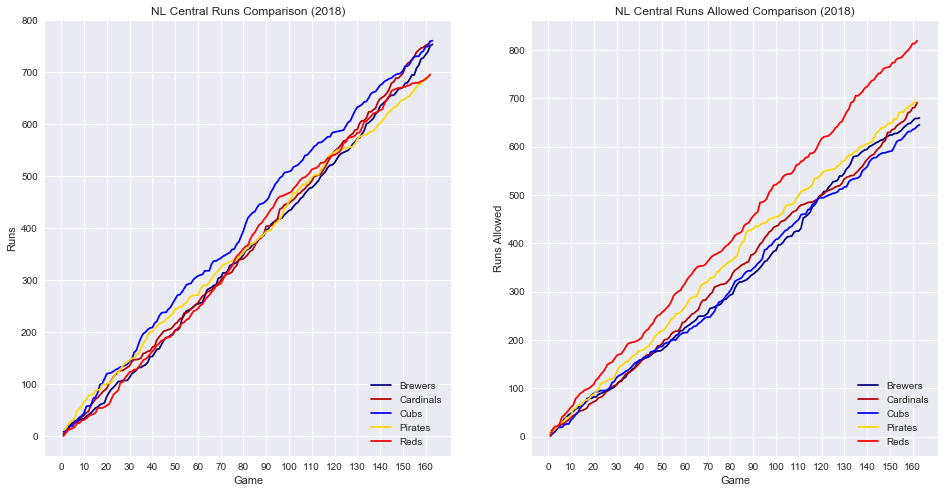

In [191]:
# Graph Runs and Runs Allowed Comparisons #
plt.rcParams["figure.figsize"] = (16,8)

plt.subplot(1,2,1)
plt.plot(brewers['Total_Runs'], label='Brewers', c='navy')
plt.plot(cardinals['Total_Runs'], label='Cardinals', c='#b30000')
plt.plot(cubs['Total_Runs'], label='Cubs', c='blue')
plt.plot(pirates['Total_Runs'], label='Pirates', c='gold')
plt.plot(reds['Total_Runs'], label='Reds', c='red')

plt.xticks(np.arange(0, len(brewers.index), step=10))
plt.xlabel('Game')
plt.ylabel('Runs')

plt.title("NL Central Runs Comparison ({})".format(year))
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(brewers['Total_RA'], label='Brewers', c='navy')
plt.plot(cardinals['Total_RA'], label='Cardinals', c='#b30000')
plt.plot(cubs['Total_RA'], label='Cubs', c='blue')
plt.plot(pirates['Total_RA'], label='Pirates', c='gold')
plt.plot(reds['Total_RA'], label='Reds', c='red')

plt.xticks(np.arange(0, len(brewers.index), step=10))
plt.xlabel('Game')
plt.ylabel('Runs Allowed')

plt.title("NL Central Runs Allowed Comparison ({})".format(year))
plt.legend(loc='lower right')

### Graphing Total Home Attendance
For fun, we take a look at each teams total home attendance throughout the season.

First we get each teams total home_attendance-to-date

In [192]:
brewers['Total_Home_Attendance'] = brewers[brewers['Home_Away'] == 'Home']['Attendance'].dropna().cumsum()
cubs['Total_Home_Attendance'] = cubs[cubs['Home_Away'] == 'Home']['Attendance'].dropna().cumsum()
cardinals['Total_Home_Attendance'] = cardinals[cardinals['Home_Away'] == 'Home']['Attendance'].dropna().cumsum()
pirates['Total_Home_Attendance'] = pirates[pirates['Home_Away'] == 'Home']['Attendance'].dropna().cumsum()
reds['Total_Home_Attendance'] = reds[reds['Home_Away'] == 'Home']['Attendance'].dropna().cumsum()

#### What the Graph Shows
The Reds and Pirates saw dramatically less people come to the ballpark compared to the rest of the division, with the Pirates coming in last with ~1.5 million attendees.

The Cubs beat out the Brewers by about 500k attendees. Given Miller Park's capacity (41,900) and Wrigley Field's Capacity (41,649), this seems to show a greater interest from Cubs fans than Brewers fans.

The Cardinals come in first at ~3.4 million attendees. This may be caused by Busch Stadium's slightly larger capacity of 49,676.

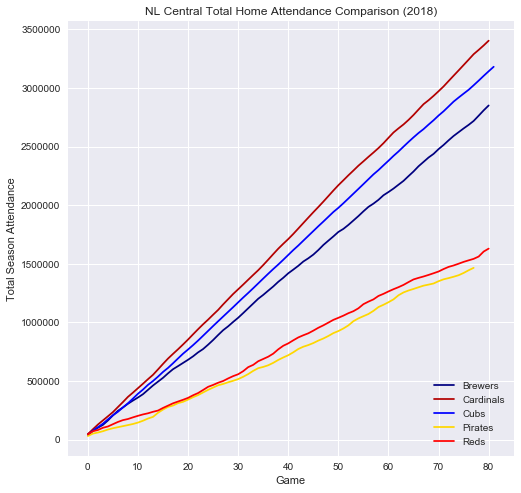

In [193]:
# Graph Total Home Attendance Comparison #
plt.rcParams["figure.figsize"] = (8,8)

# Create new Series for home attendance #
brewers_attendance = brewers['Total_Home_Attendance'].dropna()
brewers_attendance.index = range(len(brewers_attendance))

cardinals_attendance = cardinals['Total_Home_Attendance'].dropna()
cardinals_attendance.index = range(len(cardinals_attendance))

cubs_attendance = cubs['Total_Home_Attendance'].dropna()
cubs_attendance.index = range(len(cubs_attendance))

pirates_attendance = pirates['Total_Home_Attendance'].dropna()
pirates_attendance.index = range(len(pirates_attendance))

reds_attendance = reds['Total_Home_Attendance'].dropna()
reds_attendance.index = range(len(reds_attendance))

plt.plot(brewers_attendance, label='Brewers', c='navy')
plt.plot(cardinals_attendance, label='Cardinals', c='#b30000')
plt.plot(cubs_attendance, label='Cubs', c='blue')
plt.plot(pirates_attendance, label='Pirates', c='gold')
plt.plot(reds_attendance, label='Reds', c='red')

plt.xlabel('Game')
plt.ylabel('Total Season Attendance')

plt.title("NL Central Total Home Attendance Comparison ({})".format(year))
plt.legend(loc='lower right')